<h2 style="color:black; text-align:center;"><b>SALES FORECASTING BY LINEAR REGRESSION</b></h2>

<h4 style="color:black;"><b>Import Libraries</b></h4>

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
file_path = "D:\\Downloads\\archive (4)\\advertising.csv"

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [9]:
df.sample(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
181,218.5,5.4,27.4,17.2
198,283.6,42.0,66.2,25.5
112,175.7,15.4,2.4,17.1
86,76.3,27.5,16.0,12.0


<h4 style = "color:black;"><b>Data Preprocessing</b></h4>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<h4 style = "color:black;"><b>Exploratory Data Analysis</b></h4>

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

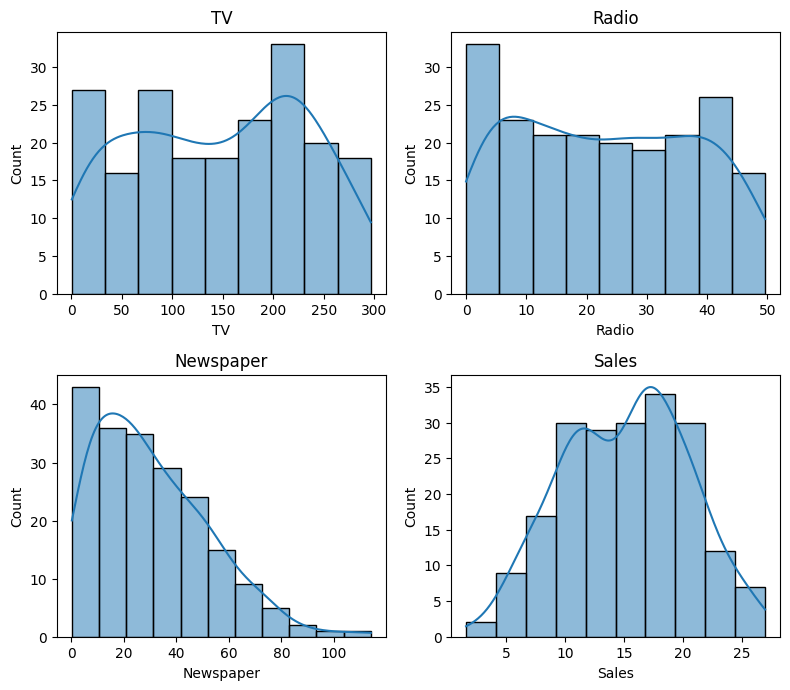

In [17]:
plt.figure(figsize = (8, 10))
subplot_index = 1

for column in df.columns:
    plt.subplot(3, 2, subplot_index)
    sns.histplot(data = df[column], kde = True)
    plt.title(column)
    plt.xlabel(column)
    subplot_index += 1

plt.tight_layout()
plt.show()

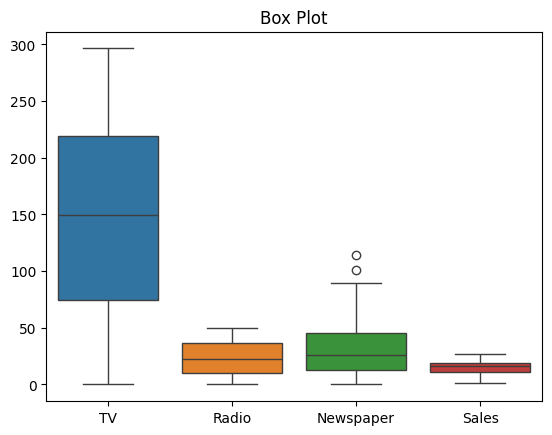

In [18]:
sns.boxplot(data = df)
plt.title('Box Plot')
plt.show()

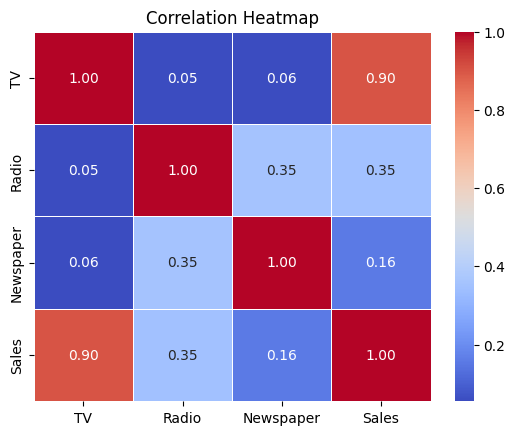

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap ='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

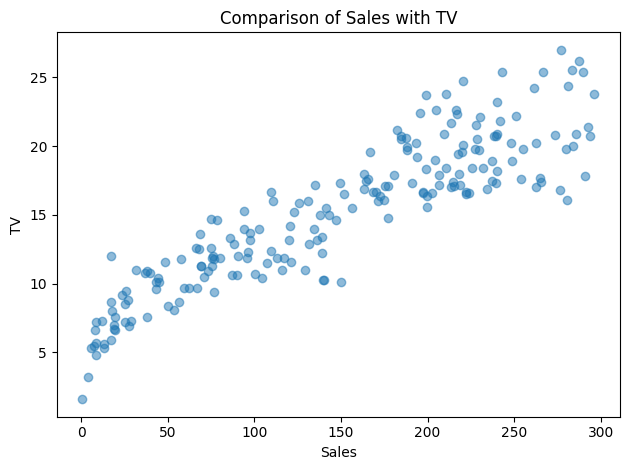

In [21]:
plt.scatter(df['TV'], df['Sales'], alpha = 0.5)
plt.xlabel("Sales")
plt.ylabel('TV')
plt.title("Comparison of Sales with TV")
plt.tight_layout()
plt.show()

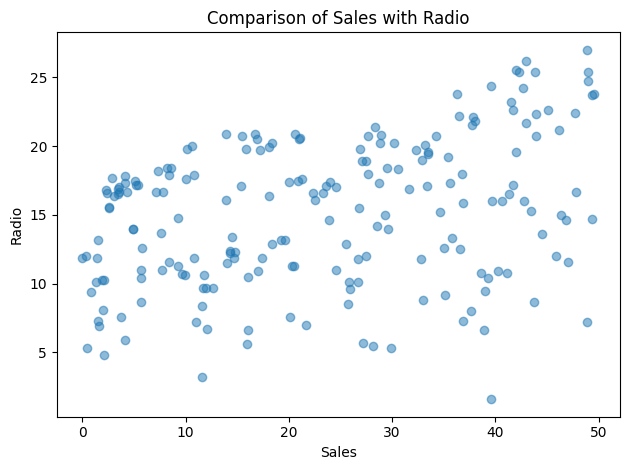

In [22]:
plt.scatter(df['Radio'], df['Sales'], alpha = 0.5)
plt.xlabel("Sales")
plt.ylabel("Radio")
plt.title("Comparison of Sales with Radio")
plt.tight_layout()
plt.show()

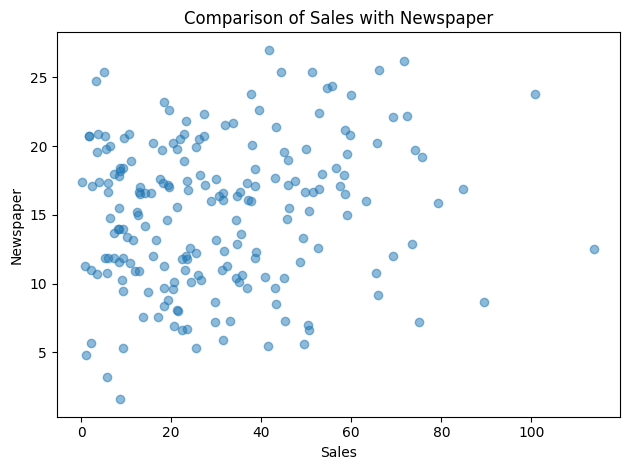

In [26]:
plt.scatter(df['Newspaper'], df['Sales'], alpha = 0.5)
plt.xlabel("Sales")
plt.ylabel("Newspaper")
plt.title("Comparison of Sales with Newspaper")
plt.tight_layout()
plt.show()

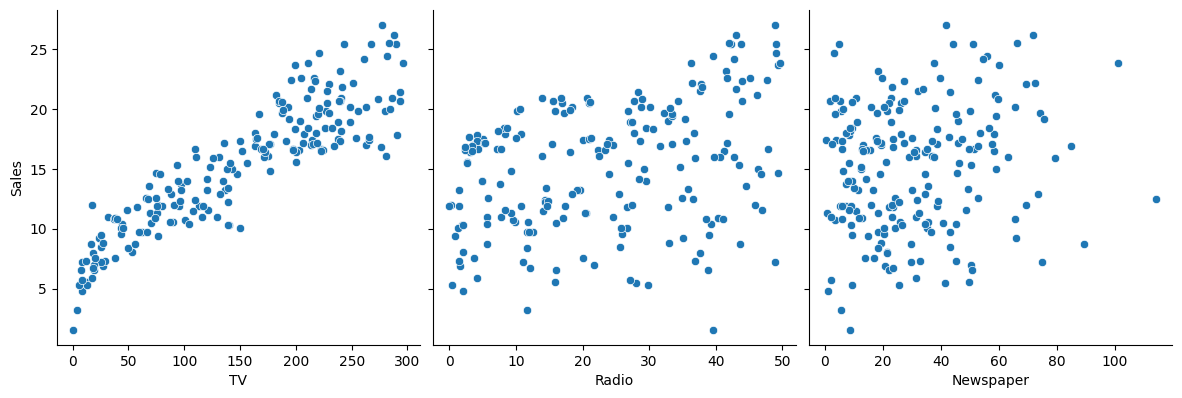

In [25]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size = 4, kind = 'scatter')
plt.show()